# Part 1: Data Creation, Wranggling, Scrapping

# Sentiment Analysis with BERT using hugingface, PyTorch and Python


### Create Custom Dataset

In [28]:
!pip install -qq google-play-scraper

In [29]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [30]:
app_packages = [
      'com.anydo',
      'com.todoist',
      'com.ticktick.task',
      'com.habitrpg.android.habitica',
      'cc.forestapp',
      'com.oristats.habitbull',
      'com.levor.liferpgtasks',
      'com.habitnow',
      'com.microsoft.todos',
      'prox.lab.calclock',
      'com.gmail.jmartindev.timetune',
      'com.artfulagenda.app',
      'com.tasks.android',
      'com.appgenix.bizcal',
      'com.appxy.planner'
]

In [31]:
len(app_packages)

15

In [32]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:02<00:00,  5.22it/s]


In [33]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys=True,
      default=str
  )

  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [34]:
print_json(app_infos[8])

{
  "adSupported": false,
  "appId": "com.microsoft.todos",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Microsoft To Do is a task management app to help you stay organized and manage your day-to-day. You can use Microsoft To Do to make shopping lists or task lists, take notes, record collections, plan an event, or set reminders to increase your productivity and focus on what matters to you. Microsoft To Do makes it easy to stay organized and manage your life.\r\n\r\nAccomplish what's meaningful and important to you each day with My Day and Suggestions, your personalized daily planner tools. Intelligent suggestions recommend tasks from across your lists that may be relevant for the day. From grocery lists to housecleaning routines, daily tasks are simple with To Do. When you're quickly switching between contexts and tasks, it's important to have tools that help you achieve what matters. Microsoft To Do

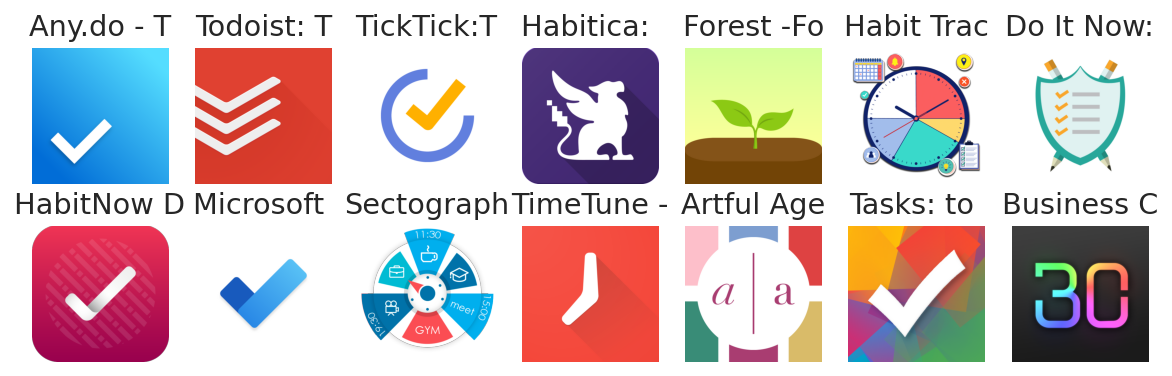

In [35]:
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(10, 3))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(ai['title'][:10])
  ax.axis('off')

In [36]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

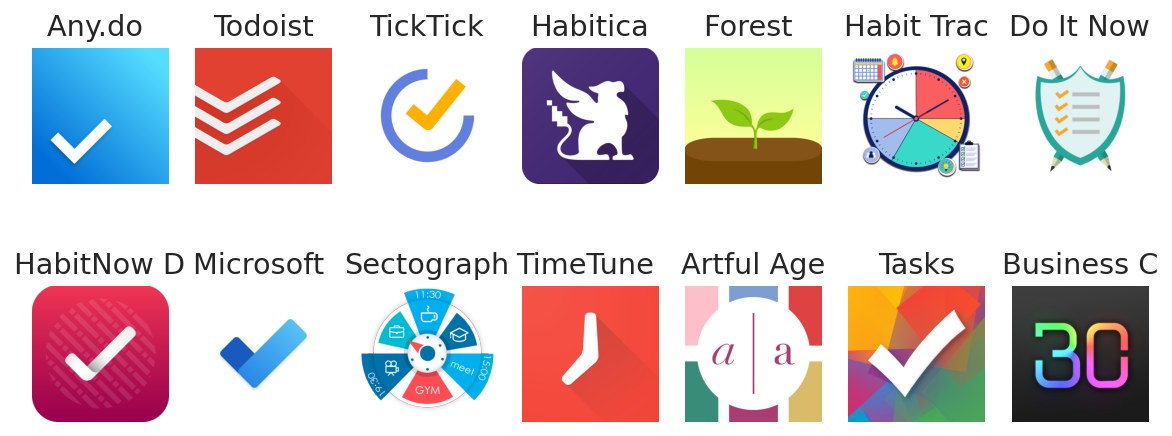

In [37]:
fig, axs = plt.subplots(2, len(app_infos)//2, figsize=(10, 4))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title'][:10]))
  ax.axis('off')

In [38]:
app_infos_df = pd.DataFrame(app_infos)

app_infos_df.head(2)

title  \
0  Any.do - To do list & Calendar   
1     Todoist: To-Do List & Tasks   

                                         description  \
0  ü•á <b>"#1 to do list app out there‚Äù</b> - WSJ\r...   
1  üèÜ <b>2020 Editor's Choice</b> by Google\r\nü•á "...   

                                     descriptionHTML  \
0  ü•á <b>&quot;#1 to do list app out there‚Äù</b> - ...   
1  üèÜ <b>2020 Editor&#39;s Choice</b> by Google<br...   

                                             summary     installs  \
0  Simple planner with to-do list, tasks, reminde...  10,000,000+   
1  ‚ÄúThe best to-do list app right now‚Äù - The Verg...  10,000,000+   

   minInstalls     score  ratings  reviews  \
0     10000000  4.357462   434519    35618   
1     10000000  4.512061   241908    15529   

                              histogram  ...  contentRatingDescription  \
0  [32323, 10997, 26314, 64259, 300614]  ...                      None   
1    [13561, 4860, 8136, 32911, 182428]  ...                      None   

   adSupported containsAds      released     updated             version  \
0        False       False  Nov 10, 2011  1644346628  Varies with device   
1        False       False  Nov 18, 2012  1654193971  Varies with device   

                                       recentChanges  \
0  What's new?\r\n- Filters! You can now filter y...   
1  üåü Introducing an all-new task view! \r\n\r\nBr...   

                                   recentChangesHTML        appId  \
0  What&#39;s new?<br>- Filters! You can now filt...    com.anydo   
1  üåü Introducing an all-new task view! <br><br>Br...  com.todoist   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  

[2 rows x 43 columns]

In [41]:
app_infos_df.columns

Index(['title', 'description', 'descriptionHTML', 'summary', 'installs',
       'minInstalls', 'score', 'ratings', 'reviews', 'histogram', 'price',
       'free', 'currency', 'sale', 'saleTime', 'originalPrice', 'saleText',
       'offersIAP', 'inAppProductPrice', 'developer', 'developerId',
       'developerEmail', 'developerWebsite', 'developerAddress',
       'privacyPolicy', 'genre', 'genreId', 'icon', 'headerImage',
       'screenshots', 'video', 'videoImage', 'contentRating',
       'contentRatingDescription', 'adSupported', 'containsAds', 'released',
       'updated', 'version', 'recentChanges', 'recentChangesHTML', 'appId',
       'url'],
      dtype='object')

In [39]:
app_infos_df.to_csv('app.csv', index=None, header=None)

#### Get App Reviews

In [50]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [01:11<00:00,  4.80s/it]


In [51]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2022-04-25 15:55:21",
  "content": "I used to love this app. I have used it for years. I even had (until yesterday) the paid version. I primarily use this app to sync up my alexa tasks. It started having issues, then got fixed. Now the company is saying that Amazon sync is no longer usable (unless you want to add a 3rd party to allow it access to your Amazon account).",
  "repliedAt": "2022-04-26 16:53:39",
  "replyContent": "Unfortunately, Amazon has rejected our fix and will not be reopening the Any.do Skill just yet.\nAt this point in time, our efforts seem to be blocked and we will not be able to offer with any estimate to when the integration will be reactivated :(",
  "reviewCreatedVersion": "5.15.4.2",
  "reviewId": "gp:AOqpTOETV_gyK_4K53K_0hip-ofKkumdJlGwWUBestuc2C_oLqjFdhRj5E40paAyMwaeTXyfcvUm-I2XFcmvoQ",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 35,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJzFdtk_AS

In [52]:
app_reviews_df = pd.DataFrame(app_reviews)

app_reviews_df.shape

(16962, 12)

In [53]:
app_reviews_df.head()

reviewId         userName  \
0  gp:AOqpTOETV_gyK_4K53K_0hip-ofKkumdJlGwWUBestu...  Brent Schoemann   
1  gp:AOqpTOG-nGuDe0w6if400pTvNJnK3MlfnEcJLIB84aR...        Ben Maybe   
2  gp:AOqpTOH85sc18Ajgcgj6-IGmA7Gp34fVsrbyBJ274IZ...   Anthony Duarte   
3  gp:AOqpTOGxyMqOStnhbQ_mLfnLUfd1DHAt5uRXqDNArML...   Anthony Cannon   
4  gp:AOqpTOECnmXVoFIJ9QXAK5krNRuVmF7Xpl-Xbutb2KH...     Emie Hickman   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a/AATXAJ...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   
3  https://play-lh.googleusercontent.com/a/AATXAJ...   
4  https://play-lh.googleusercontent.com/a-/AOh14...   

                                             content  score  thumbsUpCount  \
0  I used to love this app. I have used it for ye...      1             35   
1  But the paid version for a year and never succ...      1             60   
2  As a programmer, this is absolutely the most l...      1             76   
3  Redoing my review after messaging with the app...      1             81   
4  After a task is done a duplicate will appear f...      1              1   

  reviewCreatedVersion                  at  \
0             5.15.4.2 2022-04-25 15:55:21   
1             5.15.4.2 2022-03-01 17:18:50   
2             5.15.3.0 2022-01-22 11:33:48   
3             5.15.3.0 2022-01-22 13:34:47   
4                 None 2022-02-22 03:24:11   

                                        replyContent           repliedAt  \
0  Unfortunately, Amazon has rejected our fix and... 2022-04-26 16:53:39   
1  Hi, we're sorry to hear you're experiencing is... 2022-03-01 15:53:58   
2  We are sorry you feel this way! We encourage u... 2022-01-24 09:59:17   
3  Any.do is a free app, 90% of the app is comple... 2022-01-24 09:58:12   
4  We would be happy to help you resolve all of t... 2022-02-24 16:34:04   

       sortOrder      appId  
0  most_relevant  com.anydo  
1  most_relevant  com.anydo  
2  most_relevant  com.anydo  
3  most_relevant  com.anydo  
4  most_relevant  com.anydo

In [54]:
app_reviews_df.to_csv('reviews.csv', index=None, header=True)